In [5]:
import cv2
import pywt
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [6]:
pywt.families()

['haar',
 'db',
 'sym',
 'coif',
 'bior',
 'rbio',
 'dmey',
 'gaus',
 'mexh',
 'morl',
 'cgau',
 'shan',
 'fbsp',
 'cmor']

In [7]:
first = cv2.imread('1.jpg', 0)

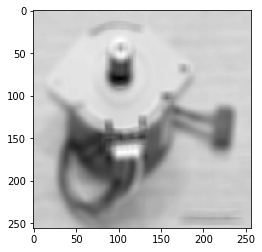

In [8]:
blurImg = cv2.blur(first, (10,10)) #You can change the kernel size as you want
plt.imshow(blurImg, cmap = 'gray')

In [9]:
second = cv2.imread('2.jpg', 0)

In [10]:
# This function does the coefficient fusing according to the fusion method
def fuseCoeff(cooef1, cooef2, method):

    if (method == 'mean'):
        cooef = (cooef1 + cooef2) / 2
    elif (method == 'min'):
        cooef = np.minimum(cooef1,cooef2)
    elif (method == 'max'):
        cooef = np.maximum(cooef1,cooef2)
    else:
        cooef = []

    return cooef

In [11]:
FUSION_METHOD = 'mean'

In [12]:
second = cv2.resize(second,first.shape)

In [13]:
second.shape

(256, 256)

In [14]:
first.shape

(256, 256)

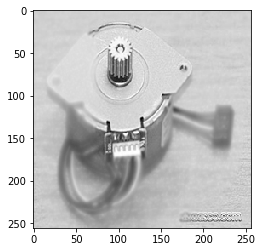

In [15]:
plt.imshow(first, cmap = 'gray')

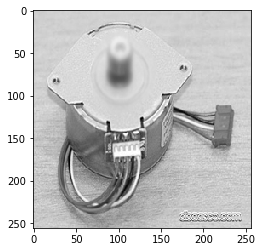

In [16]:
plt.imshow(second, cmap = 'gray')

In [17]:
print(pywt.Modes.modes)

['zero', 'constant', 'symmetric', 'periodic', 'smooth', 'periodization', 'reflect']


In [18]:
x = [3, 7, 1,3]
cA, cD = pywt.dwt(x, 'db2')

In [19]:
print(pywt.idwt(cA, cD, 'db2'))

[3. 7. 1. 3.]


In [20]:
wavelet = 'db2'
cooef1 = pywt.wavedec2(first[:,:], wavelet)
cooef2 = pywt.wavedec2(second[:,:], wavelet)

In [21]:
len(cooef1)

7

In [22]:
len(cooef2)

7

In [23]:
fuseCoeff(cooef1[1][0],cooef2[1][0], 'mean')

array([[ 1.43804235e+01,  1.29876293e+01,  8.06956736e+00,
         4.09162207e+01,  6.23278361e+00,  1.40479162e-01],
       [ 1.31363136e+01,  3.99596560e+01, -1.65659754e+02,
         5.25669997e+02, -1.02339574e+02,  4.99496899e+01],
       [ 1.70179466e+01, -5.47046733e+01,  5.85984576e+02,
        -6.07021460e+02,  9.76618655e+02,  4.59230351e+02],
       [-1.57554274e+02,  1.19328925e+01, -1.35721574e+03,
        -1.83329423e+02, -7.12576968e+02, -5.17169811e+02],
       [-1.27823714e+02, -2.21543827e+02,  8.25021577e+00,
        -4.89854846e+02,  7.58685470e+01,  6.77696939e+01],
       [ 9.34858884e+01,  1.37220189e+02,  4.98860753e+02,
         8.19945549e+02,  1.83127386e+02,  2.38092245e+01]])

In [24]:
cooef1[1]

(array([[ 1.39702893e+01,  1.24369080e+01,  8.48693433e+00,
          4.09310128e+01,  6.19651000e+00,  3.82744772e-01],
        [ 1.78495426e+01,  4.45470121e+01, -1.68244182e+02,
          5.42946186e+02, -1.01795886e+02,  4.98805142e+01],
        [ 6.02943789e+00, -4.81510825e+01,  5.85070972e+02,
         -6.11299591e+02,  8.51398681e+02,  4.23427342e+02],
        [-1.39341335e+02,  2.80715262e+01, -1.38615289e+03,
         -2.80406662e+02, -6.91854036e+02, -4.77843319e+02],
        [-1.34770926e+02, -2.30312583e+02,  4.94204952e+01,
         -3.43052108e+02,  8.07755810e+01,  5.88680458e+01],
        [ 9.37308737e+01,  1.36100491e+02,  4.49450144e+02,
          7.04014597e+02,  1.61689616e+02,  1.74416097e+01]]),
 array([[  14.91601196,  -16.95542773,   18.14160535,   -8.92201194,
          -86.5484853 ,   19.85152267],
        [  12.79997507,    7.81380057,  100.62816606,  -53.7255223 ,
          -79.1562821 ,   23.57769042],
        [   7.63004673, -174.63760592, -745.03944584, 

In [25]:
cooef1[2][2]

array([[ 4.27760926e-01,  9.25217343e-01,  8.19618733e-01,
         7.13901159e+00, -1.05910072e+01,  3.16146507e+00,
         2.69519640e+00, -3.45734478e-01, -2.67437258e+00,
         1.62734116e+00],
       [-3.00144792e+00,  1.59718219e+01,  2.09339237e+01,
         9.62348791e+01, -7.98913192e+01, -3.34178552e+00,
         1.39322075e+01,  1.54052107e+01,  2.05217392e+01,
        -1.78535699e+01],
       [-1.91932860e+00,  5.20736372e+01, -1.12201936e+01,
        -2.57495542e+02,  3.40389246e+02, -5.93280867e+01,
         1.14317189e+01,  6.78635331e+00,  3.29540829e+01,
        -2.98862278e+01],
       [ 4.72946578e+00,  3.28604160e+01, -4.12769650e+01,
         6.00837166e+02, -7.28647018e+02,  9.29860067e+01,
         1.02201041e+02,  1.49039729e+01, -1.36694016e+01,
         2.09636459e+01],
       [ 4.95597571e+00,  1.43994560e+02,  1.54497345e+02,
        -1.99226510e+02,  2.19880243e+01,  1.67304984e+02,
         8.86894610e-01,  8.71143083e+00,  7.85119919e+00,
        -9.

In [26]:
fusedCooef = []
for i in range(len(cooef1)-1):

    # The first values in each decomposition is the apprximation values of the top level
    if(i == 0):

        fusedCooef.append(fuseCoeff(cooef1[0],cooef2[0],FUSION_METHOD))

    else:

        # For the rest of the levels we have tupels with 3 coeeficents
        c1 = fuseCoeff(cooef1[i][0],cooef2[i][0],FUSION_METHOD)
        c2 = fuseCoeff(cooef1[i][1], cooef2[i][1], FUSION_METHOD)
        c3 = fuseCoeff(cooef1[i][2], cooef2[i][2], FUSION_METHOD)

        fusedCooef.append((c1,c2,c3))

In [27]:
len(fusedCooef)

6

In [28]:
# Third: After we fused the cooefficent we nned to transfor back to get the image
fusedImage = pywt.waverec2(fusedCooef, wavelet)

In [29]:
# Forth: normmalize values to be in uint8
fusedImage = np.multiply(np.divide(fusedImage - np.min(fusedImage),(np.max(fusedImage) - np.min(fusedImage))),255)
fusedImage = fusedImage.astype(np.uint8)

In [30]:
fusedImage.shape

(130, 130)

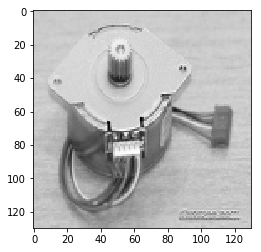

In [31]:
plt.imshow(fusedImage, cmap = 'gray')

In [32]:
cA, cD = pywt.dwt(fusedImage, 'db2')

In [33]:
ts_rec = pywt.idwt(cA, cD, 'haar')

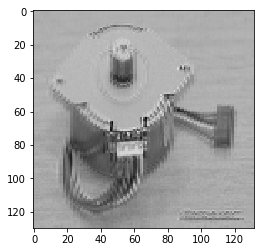

In [34]:
plt.imshow(ts_rec, cmap = 'gray')

In [35]:
w = pywt.Wavelet('sym3')

In [36]:
cA, cD = pywt.dwt(fusedImage, wavelet=w, mode='smooth')

In [37]:
result = pywt.idwt(cA, cD, 'sym3', 'smooth')

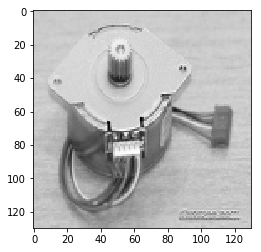

In [38]:
plt.imshow(result, cmap = 'gray')

In [39]:
(cA, cD) = pywt.dwt(first, 'db2', 'smooth')

In [40]:
cA.shape

(256, 129)